# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

processed_csv = "data/processed/historical_features.csv"

# Check file exists
if not os.path.exists(processed_csv):
    raise FileNotFoundError(f"{processed_csv} not found. Run feature pipeline first!")

# Load dataset
df = pd.read_csv(processed_csv, parse_dates=["timestamp"])
print("Dataset loaded successfully")

Dataset loaded successfully


**Check Missing Values & Outliers**

The first step in the EDA involves checking for missing values in the dataset using df.isna().sum(). This helps identify which columns have incomplete data that may require imputation or removal.

A boxplot is created for the numeric columns, including aqi, pm25, pm10, co, no2, so2, and o3, to detect potential outliers. Outliers can significantly impact model performance, especially for regression models like Random Forest. Visualizing the data in this way provides an understanding of the distribution and variability of pollutants and AQI values.


--- Missing Values ---
city         0
timestamp    0
aqi          0
pm25         0
pm10         0
co           0
no2          0
so2          0
o3           0
hour         0
day          0
month        0
weekday      0
dtype: int64


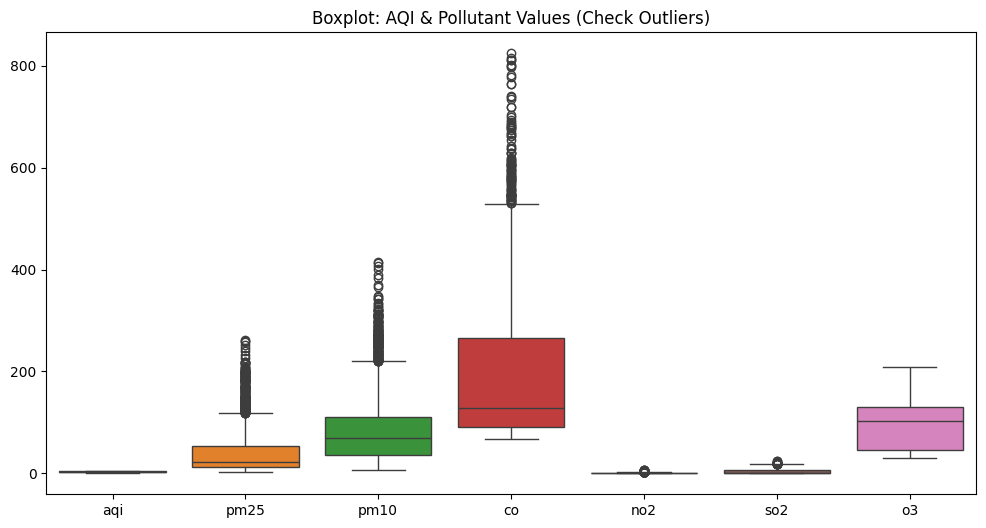

In [ ]:
# Missing values
print("\n--- Missing Values ---")
print(df.isna().sum())

# Basic outlier check for pollutants and AQI
numeric_cols = ["aqi", "pm25", "pm10", "co", "no2", "so2", "o3"]
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot: AQI & Pollutant Values (Check Outliers)")
plt.show()

**AQI Trends (Time Series)**

The daily AQI trend is analyzed by grouping data by date and calculating the mean AQI per day. Plotting this time series helps observe long-term trends, fluctuations, and potential seasonal patterns in air quality. It is useful for understanding how AQI evolves over time in Karachi and identifying periods of consistently poor or good air quality.

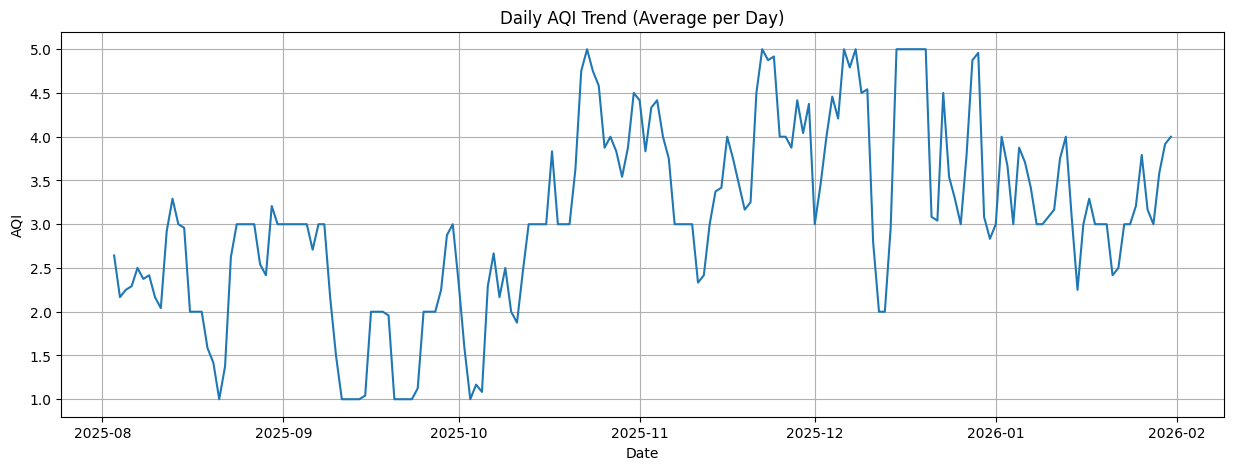

In [ ]:
# Daily AQI trend (mean per day)
df['date'] = df['timestamp'].dt.date
daily_aqi = df.groupby('date')['aqi'].mean()

plt.figure(figsize=(15,5))
daily_aqi.plot()
plt.title("Daily AQI Trend (Average per Day)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

**Diurnal & Seasonal Patterns**

The diurnal pattern analyzes AQI variations by the hour of the day, while the seasonal pattern examines monthly trends. Grouping AQI by hour highlights daily cycles, such as peak pollution times during traffic hours. Similarly, monthly aggregation reveals seasonal trends influenced by weather patterns, industrial activity, or climatic conditions, providing insights into temporal pollutant behavior.

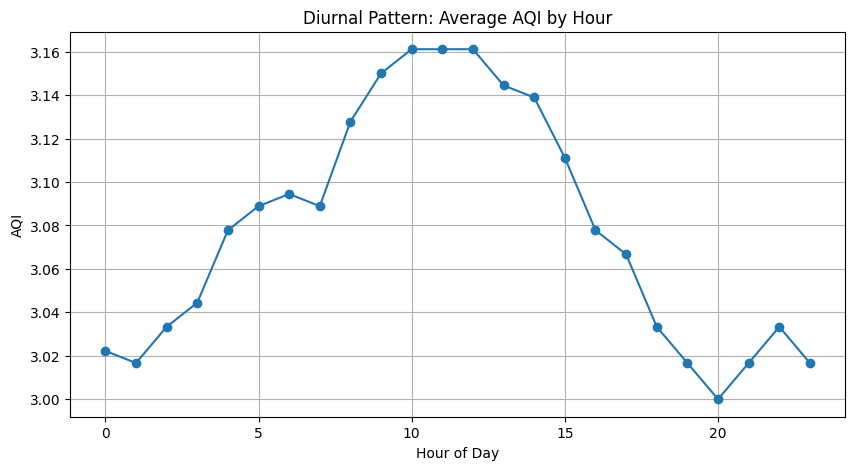

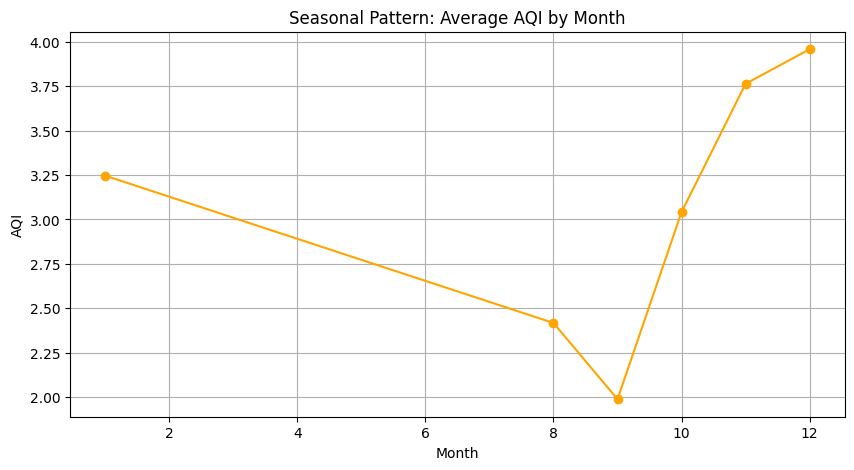

In [ ]:
# Diurnal pattern: AQI by hour of day
hourly_aqi = df.groupby('hour')['aqi'].mean()
plt.figure(figsize=(10,5))
hourly_aqi.plot(marker='o')
plt.title("Diurnal Pattern: Average AQI by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

# Seasonal pattern: AQI by month
monthly_aqi = df.groupby('month')['aqi'].mean()
plt.figure(figsize=(10,5))
monthly_aqi.plot(marker='o', color='orange')
plt.title("Seasonal Pattern: Average AQI by Month")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

**Correlation Between Pollutants & AQI**

A correlation matrix is computed for AQI and major pollutants (pm25, pm10, co, no2, so2, o3) and visualized using a heatmap. This analysis identifies how strongly each pollutant is associated with overall AQI. Strong correlations help in feature selection for the machine learning model, ensuring that the most predictive variables are included.

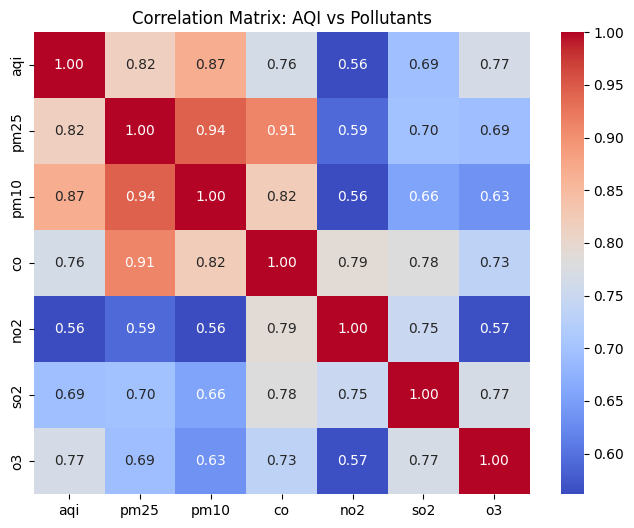

In [ ]:
# Correlation matrix
corr_cols = ["aqi", "pm25", "pm10", "co", "no2", "so2", "o3"]
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: AQI vs Pollutants")
plt.show()

**Summary Statistics**

Descriptive statistics for AQI and pollutants are generated, including mean, median, standard deviation, and quartiles. These summary metrics provide a quantitative understanding of the dataset’s central tendencies, dispersion, and range, which is essential for interpreting model outputs and detecting unusual patterns.

In [ ]:
print("\n--- Summary Statistics ---")
display(df[corr_cols].describe())


--- Summary Statistics ---


,aqi,pm25,pm10,co,no2,so2,o3
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,3.078472,37.482306,81.761211,185.193394,0.661192,3.677711,93.803956
std,1.121925,37.251620,61.286642,124.726511,0.866401,4.436003,43.132572
min,1.000000,2.200000,5.630000,68.220000,0.020000,0.060000,30.140000
25%,2.000000,11.820000,36.252500,90.610000,0.070000,0.280000,46.027500
50%,3.000000,21.575000,70.175000,127.885000,0.140000,0.630000,103.235000
75%,4.000000,54.200000,109.792500,266.297500,1.160000,7.200000,130.355000
max,5.000000,262.000000,414.470000,824.500000,6.950000,23.330000,208.980000


**AQI Category Distribution**

The AQI values are mapped to categories based on OpenWeather’s 1–5 scale: Good, Fair, Moderate, Poor, and Very Poor. A bar plot of these categories shows the frequency distribution of AQI levels. This categorical view helps communicate overall air quality trends and the proportion of days falling into each health risk level

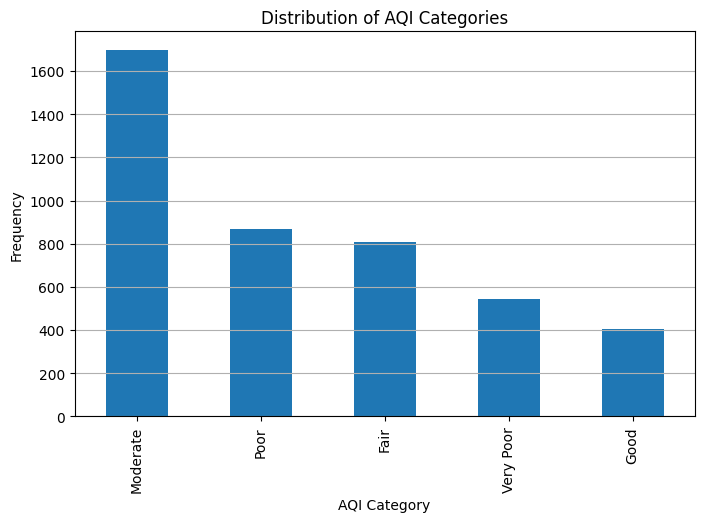

In [ ]:
# Map AQI scale (OpenWeather: 1–5)
aqi_labels = {
    1: "Good",
    2: "Fair",
    3: "Moderate",
    4: "Poor",
    5: "Very Poor"
}

df["aqi_category"] = df["aqi"].map(aqi_labels)

plt.figure(figsize=(8,5))
df["aqi_category"].value_counts().plot(kind="bar")
plt.title("Distribution of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

**Pollutant Trends Over Time (PM2.5 & PM10)**

Time series plots for PM2.5 and PM10 track the evolution of these major particulate pollutants over the dataset period. Observing their trends alongside AQI values provides insights into which pollutants drive air quality changes and highlights periods of high pollution exposure.

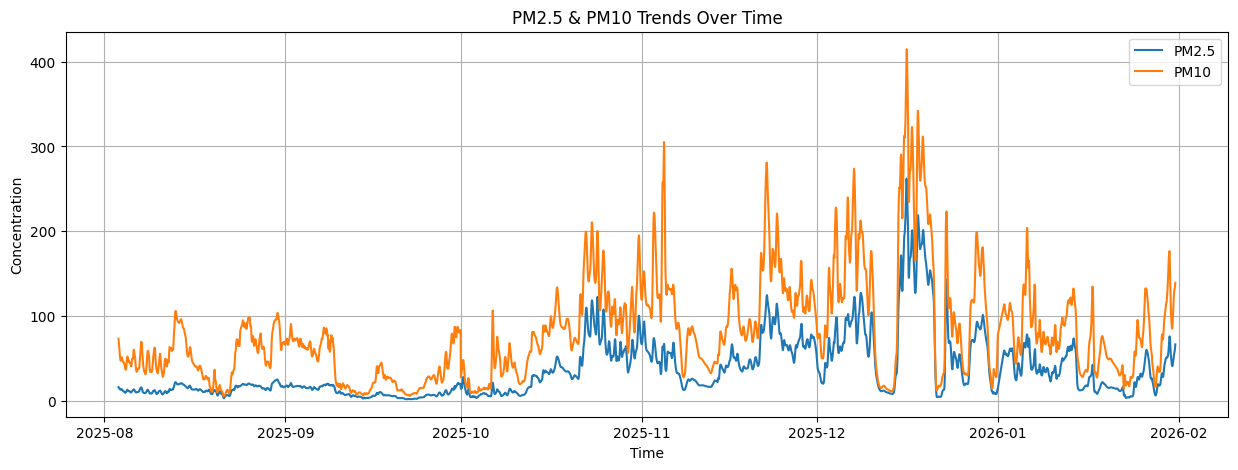

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df["timestamp"], df["pm25"], label="PM2.5")
plt.plot(df["timestamp"], df["pm10"], label="PM10")
plt.title("PM2.5 & PM10 Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.show()